<a href="https://colab.research.google.com/github/aayush9929/hello-world/blob/master/Flowers_with_data_augmenetation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import glob
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras

In [4]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 4s 0us/step


In [5]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [6]:
for cl in classes:
  img_path = os.path.join(base_dir,cl)
  print(img_path)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]
  for t in train:
    if not os.path.exists(os.path.join(base_dir,'train',cl)):
      os.makedirs(os.path.join(base_dir,'train',cl))
    shutil.move(t,os.path.join(base_dir,'train',cl))
  
  for v in val:
    if not os.path.exists(os.path.join(base_dir,'val',cl)):
      os.makedirs(os.path.join(base_dir,'val',cl))
    shutil.move(v,os.path.join(base_dir,'val',cl))

/root/.keras/datasets/flower_photos/roses
roses: 641 Images
/root/.keras/datasets/flower_photos/daisy
daisy: 633 Images
/root/.keras/datasets/flower_photos/dandelion
dandelion: 898 Images
/root/.keras/datasets/flower_photos/sunflowers
sunflowers: 699 Images
/root/.keras/datasets/flower_photos/tulips
tulips: 799 Images


In [7]:
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
batch_size = 100
IMG_SHAPE = (150,150)

In [10]:
image_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(train_dir)



Found 2935 images belonging to 5 classes.


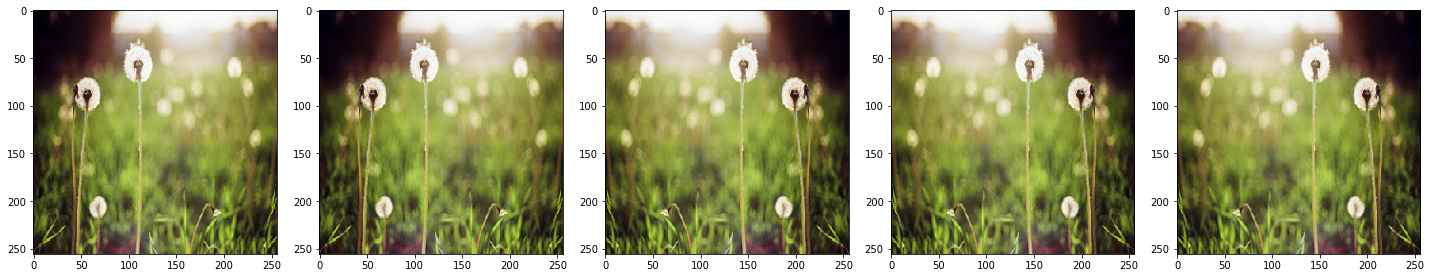

In [11]:

def plotImages(images_arr):
  fig,axes = plt.subplots(1,5,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [12]:
image_gen = ImageDataGenerator(rescale=1./255,rotation_range=45)

train_data_gen = image_gen.flow_from_directory(train_dir)

Found 2935 images belonging to 5 classes.


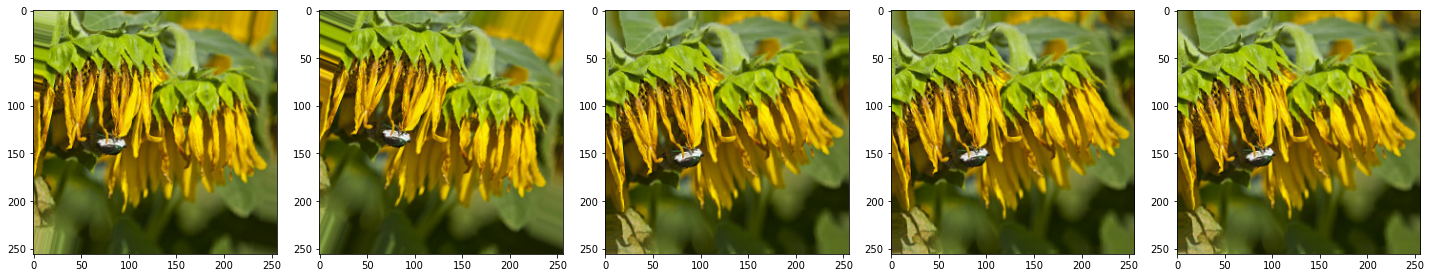

In [13]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [14]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(train_dir)

Found 2935 images belonging to 5 classes.


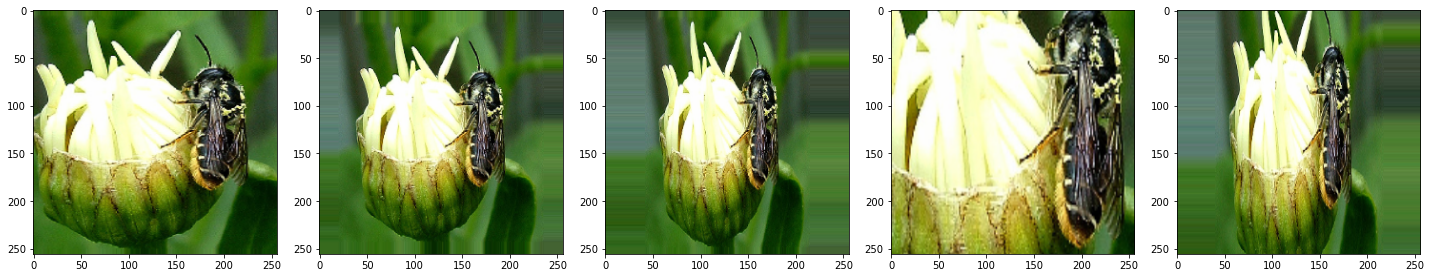

In [15]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [16]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45, zoom_range=.50, horizontal_flip=True, width_shift_range=0.15, height_shift_range=0.15,)

train_data_gen = image_gen.flow_from_directory(train_dir,target_size=IMG_SHAPE,batch_size=batch_size,shuffle=True,class_mode='sparse')

Found 2935 images belonging to 5 classes.


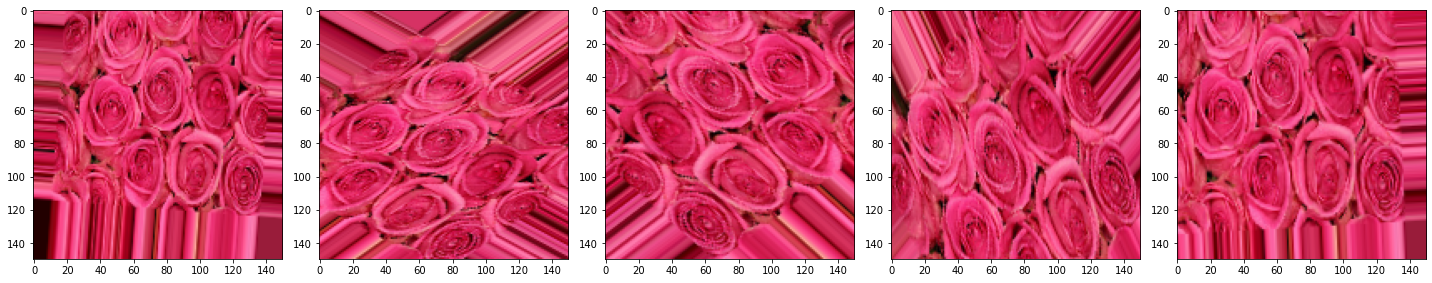

(150, 150, 3)

In [17]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)
augmented_images[0].shape

In [18]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(val_dir,target_size=IMG_SHAPE,class_mode = 'sparse',batch_size=batch_size)

Found 735 images belonging to 5 classes.


In [20]:
model = keras.Sequential([
                          keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (150,150,3)),
                          keras.layers.MaxPool2D((2,2)),

                          keras.layers.Conv2D(32,(3,3),activation='relu'),
                          keras.layers.MaxPool2D((2,2)),

                          keras.layers.Conv2D(64,(3,3),activation='relu'),
                          keras.layers.MaxPool2D((2,2)),

                          keras.layers.Dropout(0.2),
                          keras.layers.Flatten(),
                          keras.layers.Dense(512,activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(5),

                        

])

In [21]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
epochs = 40

history = model.fit_generator(train_data_gen,
                              steps_per_epoch=int(np.ceil(len(train_data_gen.filenames)/batch_size)),
                              epochs = epochs,
                              validation_data = val_data_gen,
                              validation_steps = int(np.ceil(len(val_data_gen.filenames)/batch_size)))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
30/30 [==============================] - 25s 840ms/step - loss: 1.5315 - accuracy: 0.3799 - val_loss: 1.2074 - val_accuracy: 0.5007
Epoch 2/40
30/30 [==============================] - 25s 846ms/step - loss: 1.1239 - accuracy: 0.5291 - val_loss: 1.0382 - val_accuracy: 0.5837
Epoch 3/40
30/30 [==============================] - 26s 859ms/step - loss: 1.0537 - accuracy: 0.5792 - val_loss: 1.0198 - val_accuracy: 0.5837
Epoch 4/40
30/30 [==============================] - 26s 850ms/step - loss: 0.9965 - accuracy: 0.6010 - val_loss: 0.9979 - val_accuracy: 0.5973
Epoch 5/40
30/30 [==============================] - 26s 854ms/step - loss: 0.9284 - accuracy: 0.6303 - val_loss: 0.9774 - val_accuracy: 0.6313
Epoch 6/40
30/30 [==============================] - 26s 854ms/step - loss: 0.8880 - accuracy: 0.6504 - val_loss: 0.8984 - val_accuracy: 0.6531
Epoch 7/40
30/30 [==============================] - 26s 855ms/step

In [23]:
model.save('mymodel')
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print(accuracy,val_accuracy)

[0.3798977732658386, 0.5291311740875244, 0.5792163610458374, 0.6010221242904663, 0.6303237080574036, 0.650425910949707, 0.6606473326683044, 0.6749573945999146, 0.6793867349624634, 0.6841567158699036, 0.6872231960296631, 0.7052810788154602, 0.7056217789649963, 0.7032368183135986, 0.7120953798294067, 0.7148211002349854, 0.7168654203414917, 0.7318568825721741, 0.718228280544281, 0.7155025601387024, 0.7386711835861206, 0.7304940223693848, 0.7386711835861206, 0.745826244354248, 0.7577512860298157, 0.7485519647598267, 0.745144784450531, 0.7519590854644775, 0.7587734460830688, 0.7693356275558472, 0.7638841271400452, 0.7649062871932983, 0.7758092284202576, 0.7604770064353943, 0.767632007598877, 0.7788756489753723, 0.777512788772583, 0.776831328868866, 0.7809199094772339, 0.7948892712593079] [0.5006802678108215, 0.5836734771728516, 0.5836734771728516, 0.597278892993927, 0.6312925219535828, 0.6530612111091614, 0.6761904954910278, 0.678911566734314, 0.6925169825553894, 0.6993197202682495, 0.69115

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
epochs_range = range(epochs)

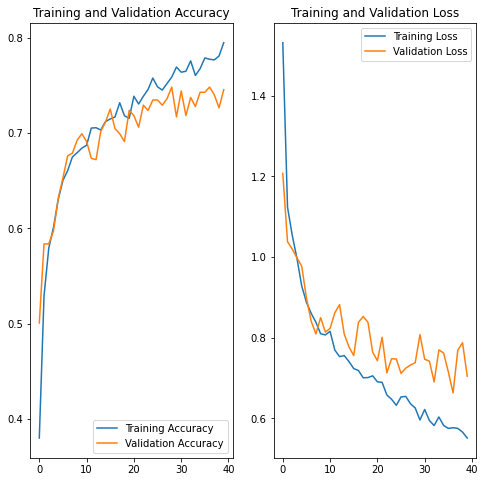

In [27]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()